In [16]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import validation_curve

In [2]:
# load the data
df = pd.read_csv('./Data/Final_18_features_extracted_V2.csv')

In [3]:
X = df.drop(columns=["Region","File Name"],axis=1)
y = df['Region']

In [4]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=17,shuffle=True
)

In [5]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=17)

- Initializing AdaBoost with default parameters
  - base_estimator: None(DT with max_depth 1)
  - n_estimators: 50
  - learning_rate: 1.0
  - algorthim: SAMME.R

In [9]:
adaboost = AdaBoostClassifier(random_state=17)

- Lets check out results with deafult parameters

In [10]:
CVscores = cross_val_score(adaboost,X_train,y_train,cv=skf)
CVscores.mean()*100

45.41854660889495

In [13]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier(random_state=17)

In [14]:
# accuracy on the train set
pred = adaboost.predict(X_train)
accuracy_score(y_train,pred)

0.4843084686957893

In [15]:
# accuracy on the test set
pred = adaboost.predict(X_test)
accuracy_score(y_test,pred)

0.4757174392935982

- yo! This is pretty good! We have no variance problem! Only high bias! I think with proper hyperparameter tuning we can fix this!

---

## Validation Curve

In [19]:
adaboost = AdaBoostClassifier(random_state=17)

In [17]:
## A helper function to plot validation curves
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )

- Learning rate

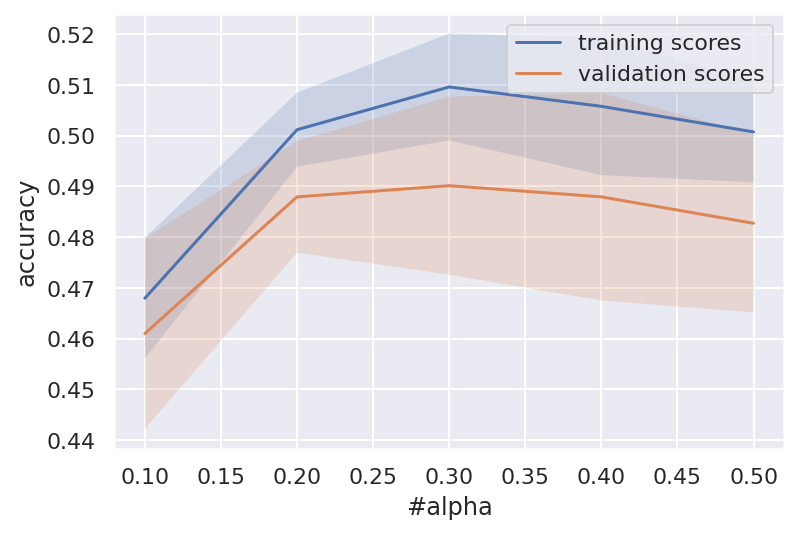

In [21]:
learning_rate = np.linspace(0.1,0.5,5)
val_train, val_test = validation_curve(
    estimator=adaboost,
    X=X_train,
    y=y_train,
    param_name='learning_rate',
    param_range=learning_rate,
    cv=skf,
    scoring="accuracy"
)

plot_with_err(learning_rate, val_train, label="training scores")
plot_with_err(learning_rate, val_test, label="validation scores")
plt.xlabel("#alpha")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True);

- n_estimators

In [25]:
adaboost = AdaBoostClassifier(random_state=17)

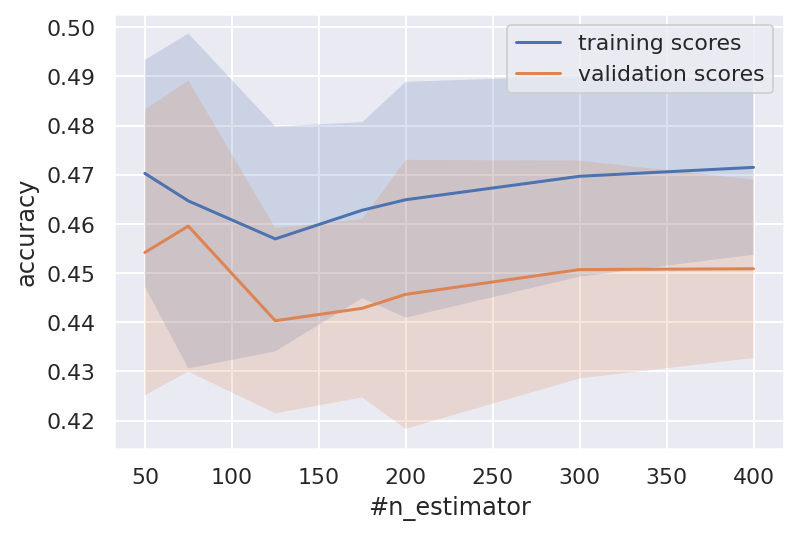

In [28]:
n_estimators = [50,75,125,175,200,300,400]
val_train, val_test = validation_curve(
    estimator=adaboost,
    X=X_train,
    y=y_train,
    param_name='n_estimators',
    param_range=n_estimators,
    cv=skf,
    scoring="accuracy"
)

plot_with_err(n_estimators, val_train, label="training scores")
plot_with_err(n_estimators, val_test, label="validation scores")
plt.xlabel("#n_estimator")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True);

---

- Lets use these plots to do hyperparameter tuning

In [29]:
params = {
    'n_estimators': [50,100,150,200,250],
    'learning_rate': np.linspace(0.15,0.35,5)
}

adaboost = AdaBoostClassifier(random_state=17)
gcv = GridSearchCV(adaboost,params,n_jobs=-1,cv=skf,verbose=1)

In [30]:
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=AdaBoostClassifier(random_state=17), n_jobs=-1,
             param_grid={'learning_rate': array([0.15, 0.2 , 0.25, 0.3 , 0.35]),
                         'n_estimators': [50, 100, 150, 200, 250]},
             verbose=1)

In [31]:
gcv.best_estimator_

AdaBoostClassifier(learning_rate=0.3, n_estimators=100, random_state=17)

In [32]:
gcv.best_score_

0.49298262622646816

### Note:
- MEH! dont wanna work on this anymore! 
- ITS TIME FOR GRADIENT BOOSTING!